# Section B Classification and web development
* trackID: unique identifier for each song (Maps features to their labels)
* title: title of the song. Type: text.
* tags: A comma-separated list of tags representing the words that appeared in the lyrics of the song and are assigned by human annotators. Type: text / categorical.
* loudness: overall loudness in dB. Type: float / continuous.
* tempo: estimated tempo in beats per minute (BPM). Type: float / continuous.
* time_signature: estimated number of beats per bar. Type: integer.
* key: key the track is in. Type: integer/ nominal. 
* mode: major or minor. Type: integer / binary.
* duration: duration of the song in seconds. Type: float / continuous.
* vect_1 ... vect_148: 148 columns containing pre-computed audio features of each song. 
	- These features were pre-extracted (NO TEMPORAL MEANING) from the 30 or 60 second snippets, and capture timbre, chroma, and mfcc aspects of the audio. \
	- Each feature takes a continuous value. Type: float / continuous.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()    #set seaborn format

## Load Data

In [14]:
# load data

df_feat = pd.read_csv('./data/features.csv')
df_y = pd.read_csv('./data/labels.csv')
df_test = pd.read_csv('./data/test.csv')

In [15]:
df_feat.shape, df_y.shape, df_test.shape

((8128, 157), (8128, 2), (428, 157))

### Feature Data

In [9]:
df_feat.sample(2)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
7875,758,Sing Along,"i, the, you, to, and, a, me, it, not, my, is, ...",-11.391,160.387,3.0,5.0,0.0,266.00444,42.766406,...,0.000467,0.000472,0.000472,0.000468,0.000464,0.000461,0.000447,0.000430,0.103701,0.437859
4852,5202,Heart On,"i, the, you, to, a, it, not, in, is, of, your,...",-3.455,141.433,4.0,2.0,0.0,163.13424,51.612521,...,0.001451,0.001505,0.001563,0.001565,0.001572,0.001598,0.001604,0.001548,0.166251,1.250077


In [38]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Columns: 157 entries, trackID to vect_148
dtypes: float64(154), int64(1), object(2)
memory usage: 9.7+ MB


In [39]:
df_feat.describe()

,trackID,loudness,tempo,time_signature,key,mode,duration,vect_1,vect_2,vect_3,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
count,8128.000000,8118.000000,8117.000000,8119.000000,8113.000000,8119.000000,8119.000000,8118.000000,8120.000000,8117.000000,...,8125.000000,8127.000000,8127.000000,8126.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,4277.619341,-9.528668,125.731032,3.570144,5.239492,0.684813,238.529555,43.676100,3.925979,8.670058,...,0.000717,0.000766,0.000792,0.000816,0.000812,0.000781,0.000746,0.000697,0.194084,5.181209
std,2473.352897,4.402895,34.672811,1.195778,3.591466,0.464619,88.411735,5.656777,48.410113,29.747908,...,0.000652,0.000687,0.000714,0.000723,0.000718,0.000711,0.000686,0.000648,0.086342,41.428973
min,0.000000,-35.726000,0.000000,0.000000,0.000000,0.000000,5.276280,17.606993,-289.862566,-140.558193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2133.750000,-12.197000,99.836000,3.000000,2.000000,0.000000,186.200360,40.056564,-26.148983,-8.704819,...,0.000279,0.000299,0.000305,0.000319,0.000317,0.000299,0.000292,0.000274,0.129872,0.733115
50%,4276.500000,-8.741500,121.773000,4.000000,5.000000,1.000000,228.048530,44.151439,8.617554,10.006663,...,0.000560,0.000595,0.000610,0.000634,0.000632,0.000598,0.000568,0.000530,0.179694,1.590191
75%,6419.250000,-6.120000,146.929000,4.000000,9.000000,1.000000,275.317100,48.003362,38.102432,27.194705,...,0.000917,0.000987,0.001022,0.001052,0.001052,0.000999,0.000946,0.000872,0.245001,3.743055
max,8555.000000,-0.414000,253.036000,7.000000,11.000000,1.000000,1271.718730,55.564543,150.885303,157.483210,...,0.006545,0.006613,0.006698,0.006682,0.006645,0.006777,0.006770,0.006632,0.767182,3193.622527


    primary key(int)  : `trackID`
    non-float features: `title`, `tags`
    


In [44]:
df_feat.isnull().sum().sort_values(ascending=False)

key         15
vect_12     13
vect_6      12
tags        12
vect_4      12
            ..
vect_93      0
vect_94      0
vect_97      0
vect_101     0
vect_148     0
Length: 157, dtype: int64

NULL values is low compared to the dataset length. Look at some distributions of the continuous variables

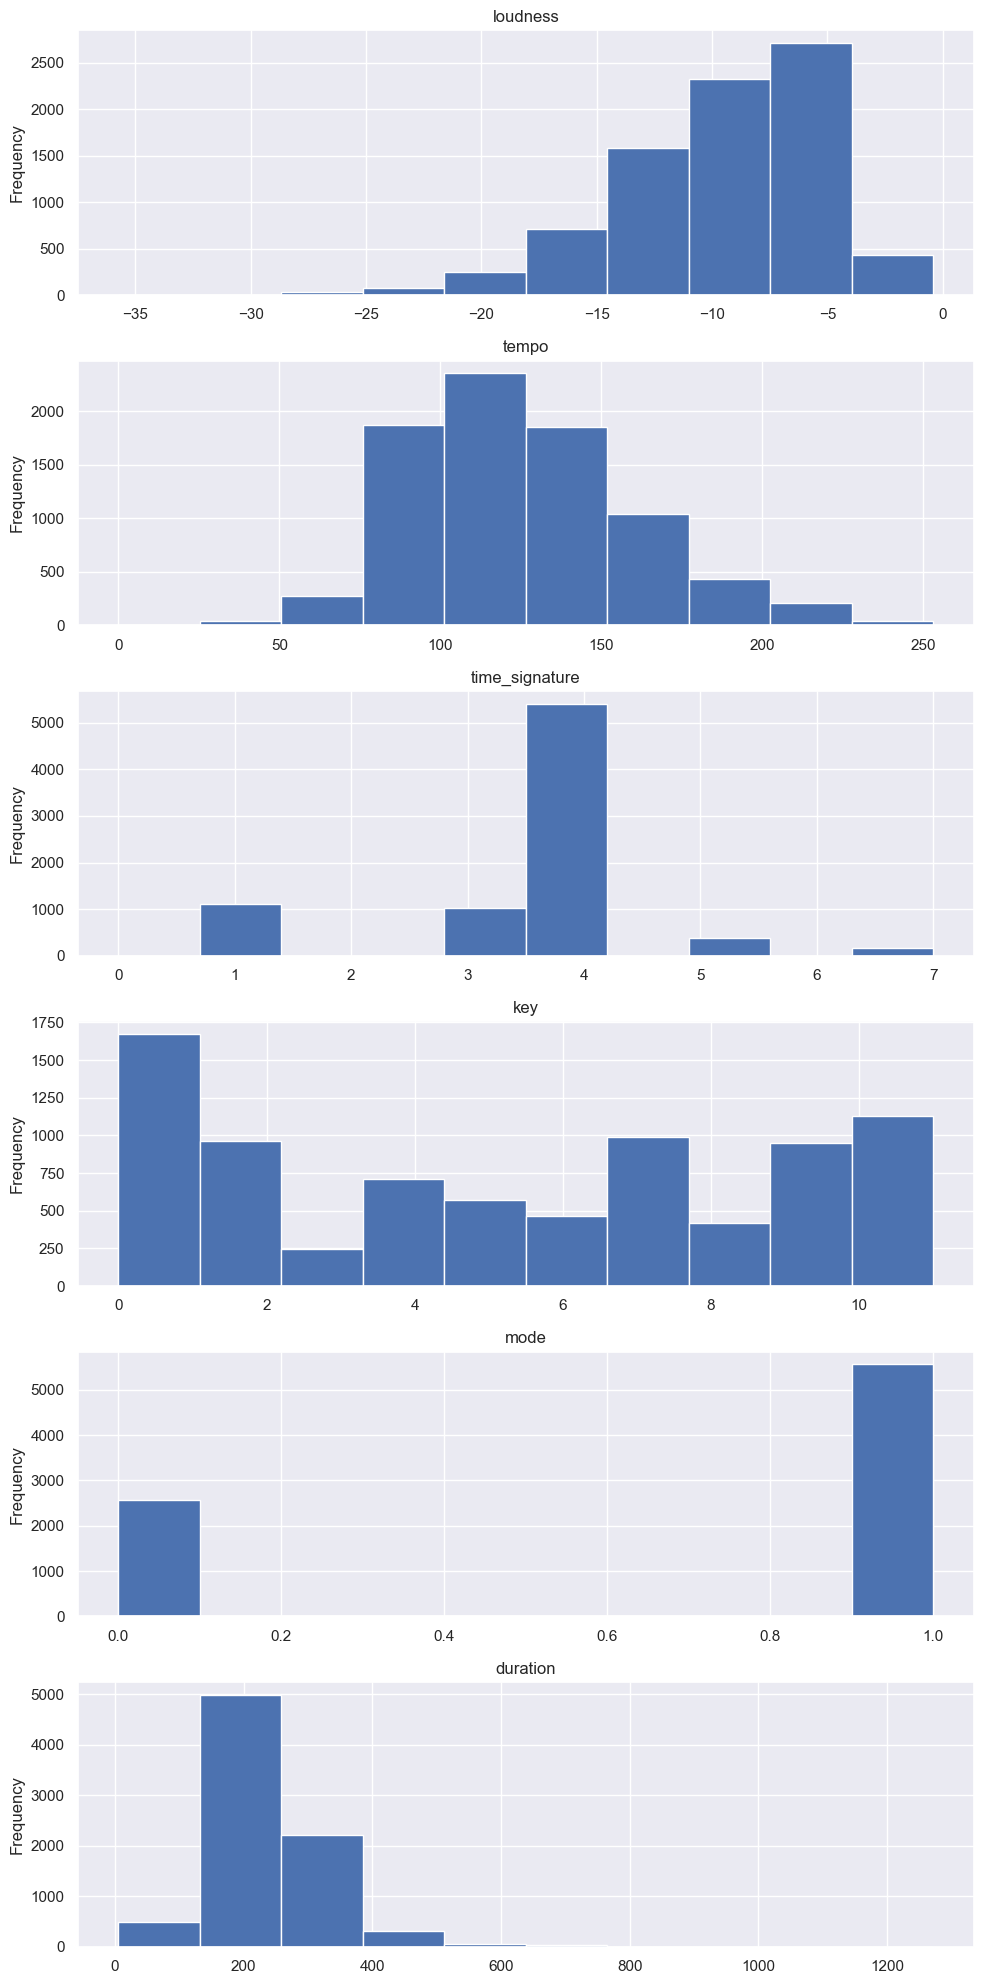

In [51]:
fig, axes = plt.subplots(nrows=len(["loudness", "tempo", "time_signature", "key", "mode", "duration"]), ncols=1, figsize=(10, 20))

# Iterate over each feature and plot its histogram on a separate subplot
for i, feat in enumerate(["loudness", "tempo", "time_signature", "key", "mode", "duration"]):
    df_feat[feat].plot(kind='hist', ax=axes[i])
    axes[i].set_title(feat)  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()

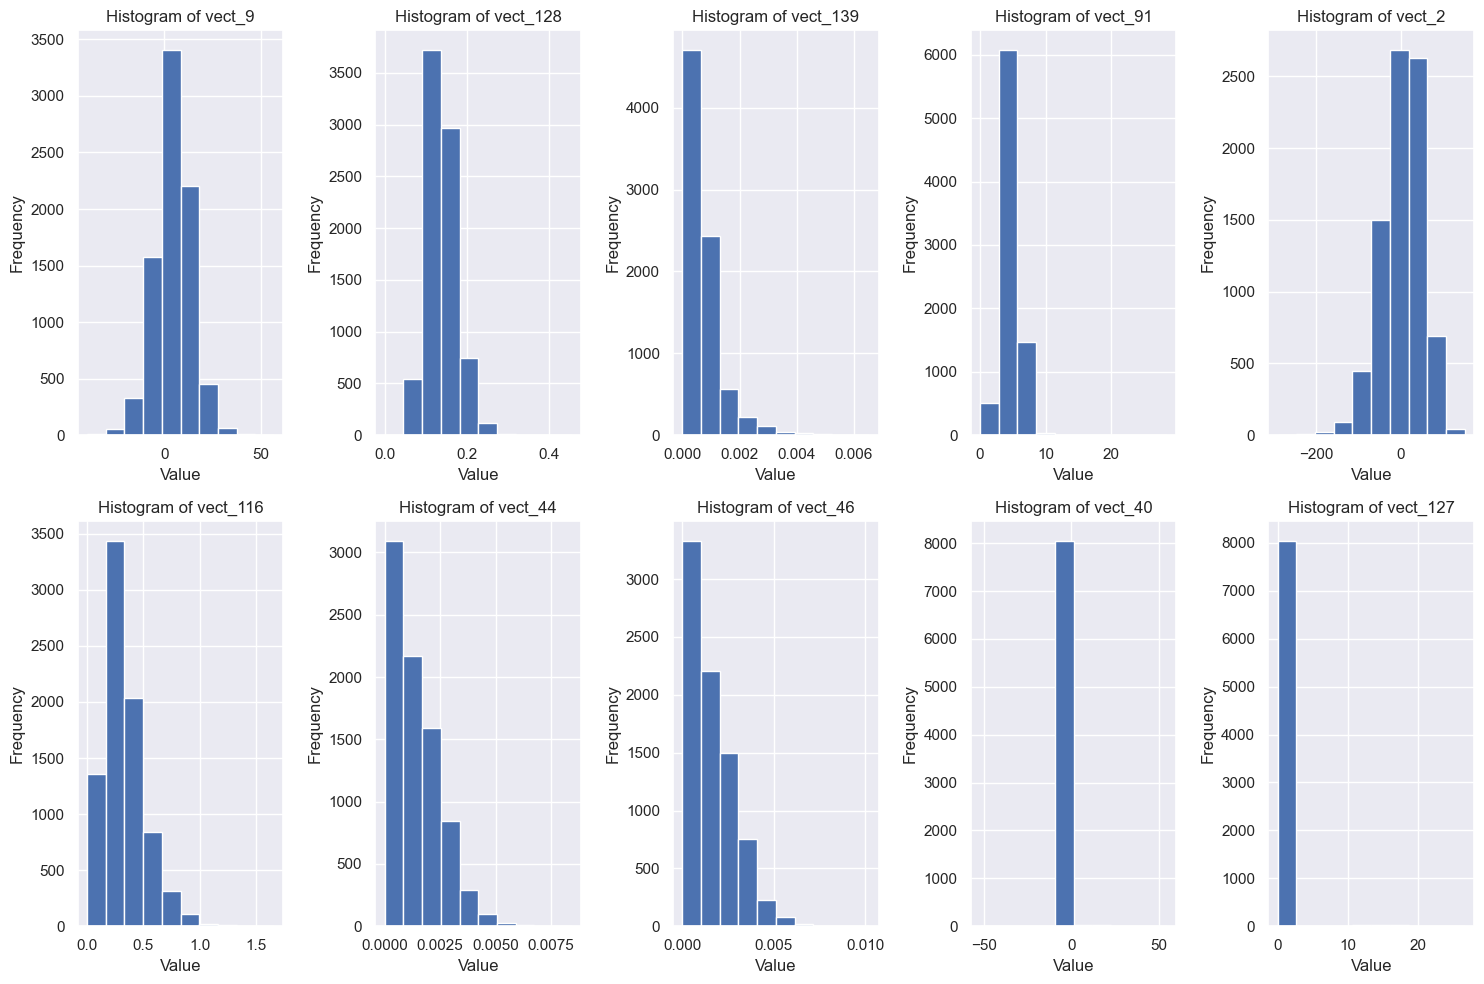

In [79]:
import random

random_column_indices = random.sample(range(len(df_feat.columns)), 10)

# Plot histograms for the randomly selected columns
plt.figure(figsize=(15, 10))
for i, column_index in enumerate(random_column_indices, start=1):
    plt.subplot(2, 5, i)
    random_column_name = df_feat.columns[column_index]
    df_feat[random_column_name].plot(kind='hist')
    plt.title(f'Histogram of {random_column_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [72]:
df_feat['vect_85'].sample()

3944    0.208491
Name: vect_85, dtype: float64

In [78]:
filtered_columns = []


# Check each column for unique values
for col in df_feat.columns:
    unique_values = df_feat[col].unique()
    if len(unique_values) < 40:
        filtered_columns.append(col)

# Display the columns where the number of unique values is less than 10
print("Columns where the number of unique values is less than 10:")
print(filtered_columns)


Columns where the number of unique values is less than 10:
['time_signature', 'key', 'mode']


We will assume that categorical features are only 'time_signature', 'key', 'mode'.

In [59]:
df_feat.head(1)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
0,6654,Beside the Yellow Line,"i, the, to, and, a, me, it, not, in, my, is, o...",-8.539,104.341,3.0,7.0,1.0,298.73587,44.462048,...,0.000308,0.000302,0.000302,0.000315,0.000297,0.000305,0.000266,0.000225,0.130826,1.071914


Likely to just drop title and tags. But might make an aggregated feature like length of tags or longest word.

### Labels

In [10]:
df_y.sample(2)

,trackID,genre
3317,3722,soul and reggae
1459,8038,soul and reggae


In [19]:
df_y.genre.unique()

array(['metal', 'folk', 'jazz and blues', 'soul and reggae',
       'classic pop and rock', 'punk', 'dance and electronica', 'pop'],
      dtype=object)

In [34]:
df_y.groupby(['genre']).count().sort_values(by='trackID',ascending=False) / len(df_y) *100

,trackID
genre,
classic pop and rock,20.718504
folk,20.484744
metal,14.874508
soul and reggae,12.155512
punk,12.069390
pop,8.993602
dance and electronica,6.434547
jazz and blues,4.269193


Can consider rebalancing Labels since some categories are much more available in the data set than others. Example classic pop and rock is 5 times jazz and blues

In [28]:
len(df_y)

8128

### test data

In [11]:
df_test.sample(2)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
398,5266,Lucky In Love,"i, the, you, to, and, a, me, it, not, my, is, ...",-15.201,136.016,4,7,1,162.82077,37.615556,...,0.000174,0.000190,0.000199,0.000207,0.000207,0.000207,0.000193,0.000174,0.137887,0.727474
110,7296,something wonderful,"the, you, to, and, a, it, not, in, is, of, you...",-18.868,120.357,5,11,1,212.92363,30.388386,...,0.000209,0.000235,0.000233,0.000211,0.000187,0.000129,0.000117,0.000130,0.215896,7.098563


## Data preprocessing

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [98]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = df_feat  # Assuming 'trackID' is the target variable
y = df_y

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Separate categorical and numerical columns
categorical_cols = ['time_signature', 'key', 'mode']
numerical_cols = [col for col in df_feat.columns if col not in ['trackID'] + categorical_cols]

# Handle non-numeric values in numerical columns
for col in numerical_cols:
    df_feat[col] = pd.to_numeric(df_feat[col], errors='coerce')  # Convert non-numeric values to NaN

# Define preprocessing steps for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale features using standardization
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder()),  # One-hot encode categorical features
])

# Combine preprocessing steps for both numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [100]:
# Define the full pipeline including preprocessing and any model you want to apply
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Now you can fit and predict using this pipeline
pipeline.fit(X_train.drop('trackID', axis=1), Y_train['genre'])
predictions = pipeline.predict(X_test)  # Replace new_data with your test data


/Users/ju/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/ju/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [101]:
predictions

array(['folk', 'folk', 'folk', ..., 'metal', 'punk', 'folk'], dtype=object)

In [102]:
Y_test

,trackID,genre
1971,879,folk
4664,1369,punk
5448,6365,pop
3333,5453,soul and reggae
2316,6221,pop
...,...,...
1149,2971,classic pop and rock
5002,8,punk
6008,6874,classic pop and rock
2283,3039,classic pop and rock


In [104]:
from sklearn.metrics import accuracy_score

# Assuming y_true and y_pred are your true and predicted labels respectively
accuracy = accuracy_score(Y_test['genre'], predictions)
print("Accuracy:", accuracy)

Accuracy: 0.2066420664206642


In [106]:
from collections import Counter

# Assuming Y_pred contains your predicted labels
prediction_counts = Counter(predictions)
print("Prediction Counts:", prediction_counts)

Prediction Counts: Counter({'classic pop and rock': 668, 'folk': 613, 'metal': 174, 'punk': 63, 'soul and reggae': 59, 'pop': 27, 'dance and electronica': 17, 'jazz and blues': 5})


In [107]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:0000:0100:01


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming X and Y are your feature and target matrices respectively
# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df_feat, df_y['genre'], test_size=0.2, random_state=42)

# Define a standard scaler for numeric features
scaler = StandardScaler()

# Scale the numeric features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_scaled, Y_train)

# Predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Count predictions
predictions_count = {label: (Y_pred == label).sum() for label in set(Y_test)}
print("Predictions count:", predictions_count)

ModuleNotFoundError: No module named 'xgboost'

---

In [51]:
from sklearn.preprocessing import LabelEncoder



In [60]:
df_feat = pd.read_csv('./data/features.csv')
df_y = pd.read_csv('./data/labels.csv')

"""
Traing with xgboost
"""
# Assuming X and Y are your feature and target matrices respectively
# Perform train-test split
X = df_feat.drop(columns=['title', 'tags']).set_index('trackID')
Y = df_y.set_index('trackID')

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the target variable
Y = label_encoder.fit_transform(Y.genre)

In [66]:
X.shape

(8128, 154)

In [68]:
X.dropna()

,loudness,tempo,time_signature,key,mode,duration,vect_1,vect_2,vect_3,vect_4,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
trackID,,,,,,,,,,,,,,,,,,,,,
6654,-8.539,104.341,3.0,7.0,1.0,298.73587,44.462048,-13.499814,26.257028,-2.794023,...,0.000308,0.000302,0.000302,0.000315,0.000297,0.000305,0.000266,0.000225,0.130826,1.071914
3424,-9.637,126.003,4.0,10.0,0.0,412.94322,40.376622,27.546188,-24.231226,49.840873,...,0.000951,0.001039,0.001116,0.001166,0.001159,0.001110,0.001015,0.000895,0.116206,0.306846
5434,-10.969,197.625,4.0,2.0,1.0,64.78322,45.598532,10.249509,52.666606,1.962486,...,0.000233,0.000284,0.000313,0.000325,0.000324,0.000299,0.000273,0.000236,0.163738,1.247803
516,-5.369,170.008,4.0,0.0,1.0,191.97342,47.159148,-52.070941,18.232822,31.694016,...,0.000853,0.000927,0.000994,0.001037,0.001051,0.001011,0.000962,0.000898,0.108193,0.366419
4906,-16.516,142.254,5.0,4.0,1.0,146.75546,36.712606,-1.896533,3.454569,-9.656709,...,0.000109,0.000130,0.000132,0.000124,0.000117,0.000109,0.000107,0.000114,0.131246,0.693531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,-13.483,117.425,4.0,0.0,1.0,197.53751,39.984047,-29.873895,16.388624,-3.624151,...,0.000580,0.000614,0.000633,0.000637,0.000634,0.000633,0.000613,0.000588,0.149750,1.077480
3397,-11.508,90.552,3.0,9.0,1.0,259.36934,39.272394,-26.411095,-54.721705,-8.332000,...,0.001244,0.001331,0.001404,0.001448,0.001455,0.001431,0.001375,0.001291,0.077494,0.303018
1760,-1.503,121.536,1.0,2.0,1.0,55.90159,53.644921,24.539225,55.392031,1.823932,...,0.001576,0.001609,0.001584,0.002127,0.001386,0.001560,0.002559,0.002041,0.305190,7.420716


In [62]:
X_clean = X.dropna()
Y_clean = Y.loc[X_clean.index]

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [65]:
Y

array([4, 2, 2, ..., 7, 3, 4])

In [72]:
"""
getting data for training
"""
df_feat = pd.read_csv('./data/features.csv')
df_y = pd.read_csv('./data/labels.csv')

"""
Traing with xgboost
"""

# Drop nulls
df_feat = df_feat.dropna()
df_y = df_y.loc[df_feat.index]
# Drop title and tags col


In [82]:
# Count of tags
df_feat['tags_count'] = df_feat['tags'].apply(lambda x: len(x.split(',')))

# Longest tag
df_feat['longest_tag_length'] = df_feat['tags'].apply(lambda x: max(len(tag) for tag in x.split(',')))

df_feat.head()

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148,tags_count,longest_tag_length
0,6654,Beside the Yellow Line,"i, the, to, and, a, me, it, not, in, my, is, o...",-8.539,104.341,3.0,7.0,1.0,298.73587,44.462048,...,0.000302,0.000315,0.000297,0.000305,0.000266,0.000225,0.130826,1.071914,88,11
2,3424,Calabria 2008,"i, the, you, to, and, a, me, it, not, in, of, ...",-9.637,126.003,4.0,10.0,0.0,412.94322,40.376622,...,0.001116,0.001166,0.001159,0.001110,0.001015,0.000895,0.116206,0.306846,94,7
3,5434,Verbal Abuse (Just an American Band),"i, you, to, and, a, me, it, not, my, is, your,...",-10.969,197.625,4.0,2.0,1.0,64.78322,45.598532,...,0.000313,0.000325,0.000324,0.000299,0.000273,0.000236,0.163738,1.247803,58,8
4,516,Helen Of Troy,"i, the, to, a, me, it, not, in, is, your, we, ...",-5.369,170.008,4.0,0.0,1.0,191.97342,47.159148,...,0.000994,0.001037,0.001051,0.001011,0.000962,0.000898,0.108193,0.366419,35,7
5,4906,Only Him Or Me - Original,"i, the, you, to, and, a, me, it, not, in, is, ...",-16.516,142.254,5.0,4.0,1.0,146.75546,36.712606,...,0.000132,0.000124,0.000117,0.000109,0.000107,0.000114,0.131246,0.693531,106,10


In [ ]:











X = df_feat.drop(columns=['title', 'tags']).set_index('trackID')
Y = df_y.set_index('trackID')

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the target variable
Y = label_encoder.fit_transform(Y.genre)

In [84]:
import pickle

In [85]:
with open('X.pickle', 'rb') as f:
    X = pickle.load(f)
with open('X.pickle', 'rb') as f:
    Y = pickle.load(f)

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7724 entries, 6654 to 2252
Columns: 156 entries, loudness to longest_tag_length
dtypes: float64(154), int64(2)
memory usage: 9.3 MB


In [87]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7724 entries, 6654 to 2252
Columns: 156 entries, loudness to longest_tag_length
dtypes: float64(154), int64(2)
memory usage: 9.3 MB


In [88]:
Y.head()

,loudness,tempo,time_signature,key,mode,duration,vect_1,vect_2,vect_3,vect_4,...,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148,tags_count,longest_tag_length
trackID,,,,,,,,,,,,,,,,,,,,,
6654,-8.539,104.341,3.0,7.0,1.0,298.73587,44.462048,-13.499814,26.257028,-2.794023,...,0.000302,0.000315,0.000297,0.000305,0.000266,0.000225,0.130826,1.071914,88,11
3424,-9.637,126.003,4.0,10.0,0.0,412.94322,40.376622,27.546188,-24.231226,49.840873,...,0.001116,0.001166,0.001159,0.001110,0.001015,0.000895,0.116206,0.306846,94,7
5434,-10.969,197.625,4.0,2.0,1.0,64.78322,45.598532,10.249509,52.666606,1.962486,...,0.000313,0.000325,0.000324,0.000299,0.000273,0.000236,0.163738,1.247803,58,8
516,-5.369,170.008,4.0,0.0,1.0,191.97342,47.159148,-52.070941,18.232822,31.694016,...,0.000994,0.001037,0.001051,0.001011,0.000962,0.000898,0.108193,0.366419,35,7
4906,-16.516,142.254,5.0,4.0,1.0,146.75546,36.712606,-1.896533,3.454569,-9.656709,...,0.000132,0.000124,0.000117,0.000109,0.000107,0.000114,0.131246,0.693531,106,10
